In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree

In [2]:
in_file_name = 'data/runs_ju.tsv'
runs = pd.read_csv(in_file_name, delimiter="\t")
runs = runs.assign(leg_id=runs.leg_nro.astype(str))
runs = runs.assign(num_runs=runs.num_runs.astype(str))
runs = runs.drop(["leg_nro", "team"], axis=1)
runs

name  year  team_id    pace num_runs leg_id
0              joni hirvikallio  2018        2   5.873        6      1
1              joni hirvikallio  2017       16   5.762        6      1
2              joni hirvikallio  2016      143   6.251        6      6
3              joni hirvikallio  2015       12   5.843        6      5
4              joni hirvikallio  2013       37   5.796        6      1
5                   topi anjala  2018        2   5.882        7      2
6                   topi anjala  2017        1   5.621        7      1
7                   topi anjala  2016        9   6.100        7      1
8                   topi anjala  2015       12   5.977        7      1
9                   topi anjala  2014       21   7.164        7      2
10                  topi anjala  2013       37   5.642        7      7
11                  topi anjala  2012       48   5.974        7      3
12                   lauri sild  2018        2   5.836        7      3
13                   lauri sild  2017        1   5.851        7      4
14                   lauri sild  2016        9   5.996        7      2
15                   lauri sild  2015       12   5.829        7      2
16                   lauri sild  2014        3   6.765        7      2
17                   lauri sild  2013        4   5.391        7      2
18                   lauri sild  2012        3   5.866        7      2
19             oleksandr kratov  2018        2   5.703        3      4
20             oleksandr kratov  2015       18   5.940        3      3
21             oleksandr kratov  2014       51   6.563        3      7
22                kenny kivikas  2018        2   5.603        7      5
23                kenny kivikas  2017        1   5.662        7      5
24                kenny kivikas  2016      143   5.837        7      7
25                kenny kivikas  2013       28   6.014        7      7
26                kenny kivikas  2012       18   6.562        7      6
27                    timo sild  2018        2   5.526        7      6
28                    timo sild  2017        1   5.272        7      6
29                    timo sild  2016        9   5.850        7      3
...                         ...   ...      ...     ...      ...    ...
76515               torbjrn vrp  2012      347  11.828        1      6
76516              trygve tömte  2012      344   7.265        1      2
76517           sebastian conge  2012      340   8.514        1      1
76518             mats lundberg  2012      295   8.396        1      4
76519            miikka huovila  2012      275   7.402        1      6
76520            sami takaluoma  2012      246  10.126        1      1
76521               antti siren  2012      246  12.509        1      4
76522               ondra kazda  2012      215   6.535        1      1
76523            oscar carlsson  2012      205   6.563        1      1
76524          victor antonsson  2012      205   7.591        1      3
76525            denis glazunov  2012      201   6.799        1      3
76526          anders österlund  2012      194   6.210        1      1
76527           jonas lindegren  2012      194   7.952        1      3
76528            filip ivermark  2012      194   7.796        1      5
76529            erik-a nilsson  2012      191   9.013        1      4
76530              anders wedin  2012      160   7.537        1      1
76531               sara timmer  2012      160  10.224        1      2
76532            jill johansson  2012      160   9.680        1      4
76533               emil åström  2012      160  11.037        1      5
76534           joakim nordling  2012      160   9.109        1      6
76535            hakon heggedal  2012      149   8.970        1      3
76536               sindre hunn  2012      149   8.981        1      4
76537    tor christian helgerud  2012      149  12.481        1      5
76538     agni fjogstad nielsen  2012      149   9.208        1      6
76539  johansen per hara havnen  2012      135   6.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:

<IPython.core.display.Javascript object>

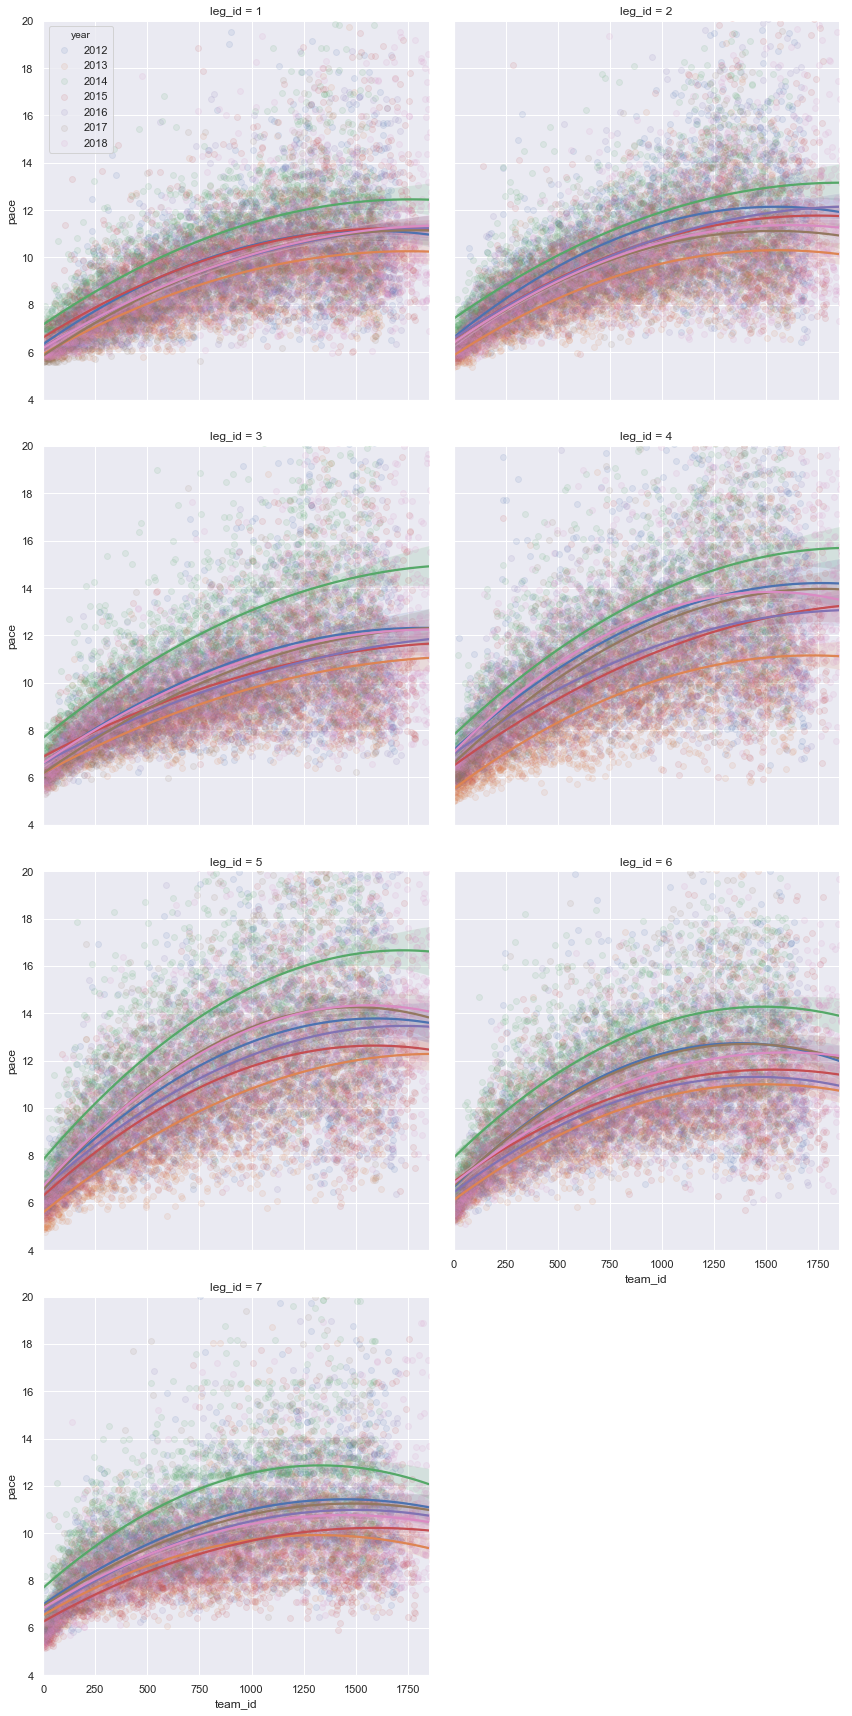

In [4]:
import seaborn as sns
sns.set(rc={})
g = sns.FacetGrid(runs, col="leg_id", hue="year", xlim=(0,1850), ylim=(4,20), height=6, aspect=1, col_wrap=2, legend_out=False)
g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()


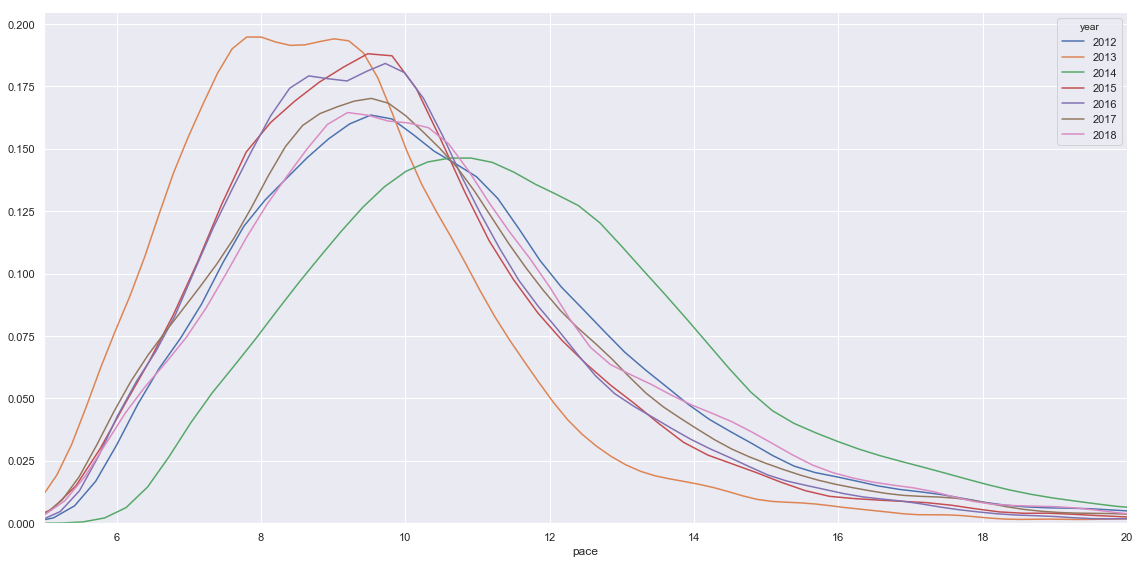

In [5]:
g = sns.FacetGrid(runs, hue="year", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()


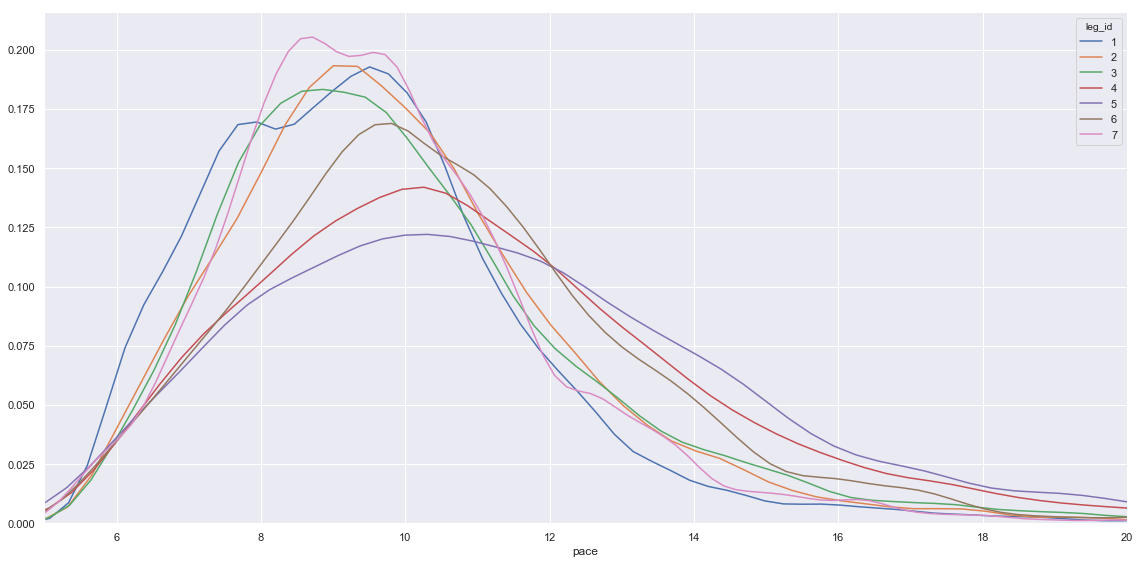

In [6]:
g = sns.FacetGrid(runs, hue="leg_id", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

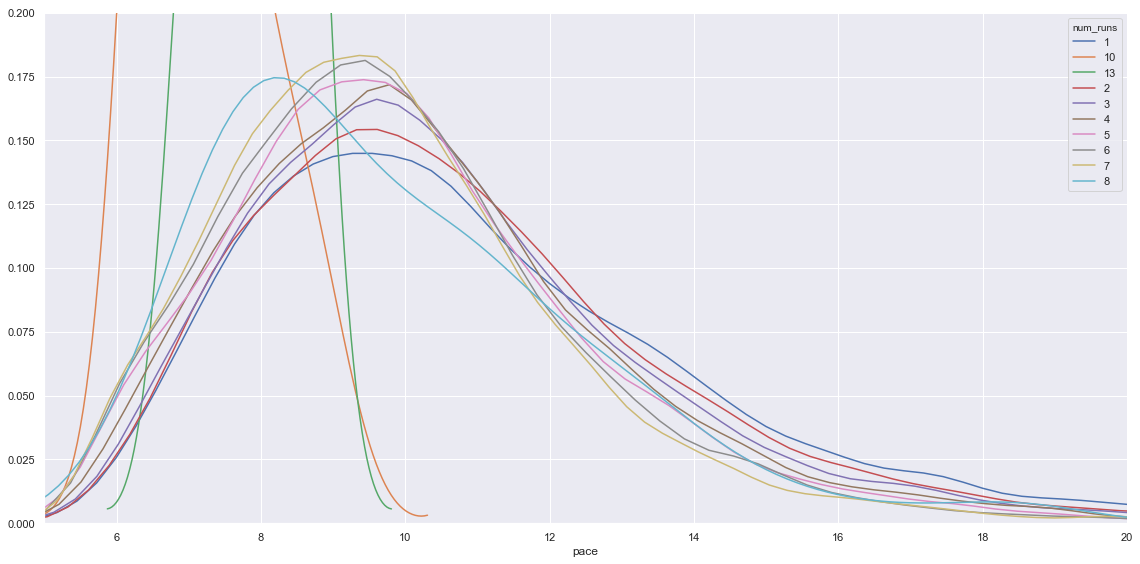

In [7]:
g = sns.FacetGrid(runs, hue="num_runs", height=8, aspect=2, xlim=(5,20), ylim=(0,0.2), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

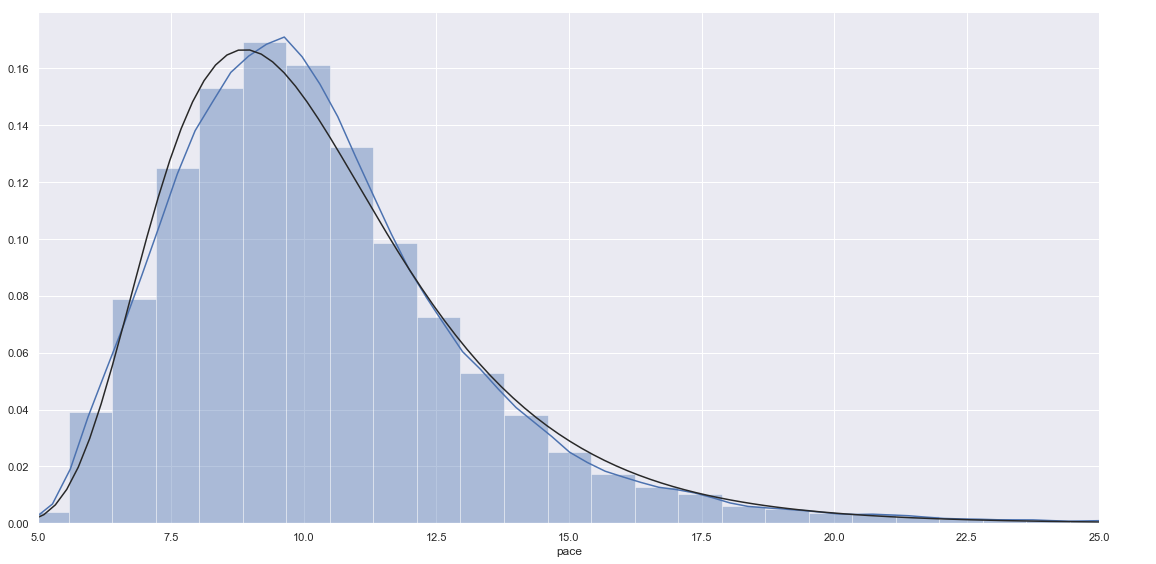

In [8]:
g = sns.FacetGrid(runs, height=8, aspect=2, xlim=(5,25), margin_titles=True) # no facet here
g.map(sns.distplot, "pace", hist=True, fit=lognorm).add_legend()

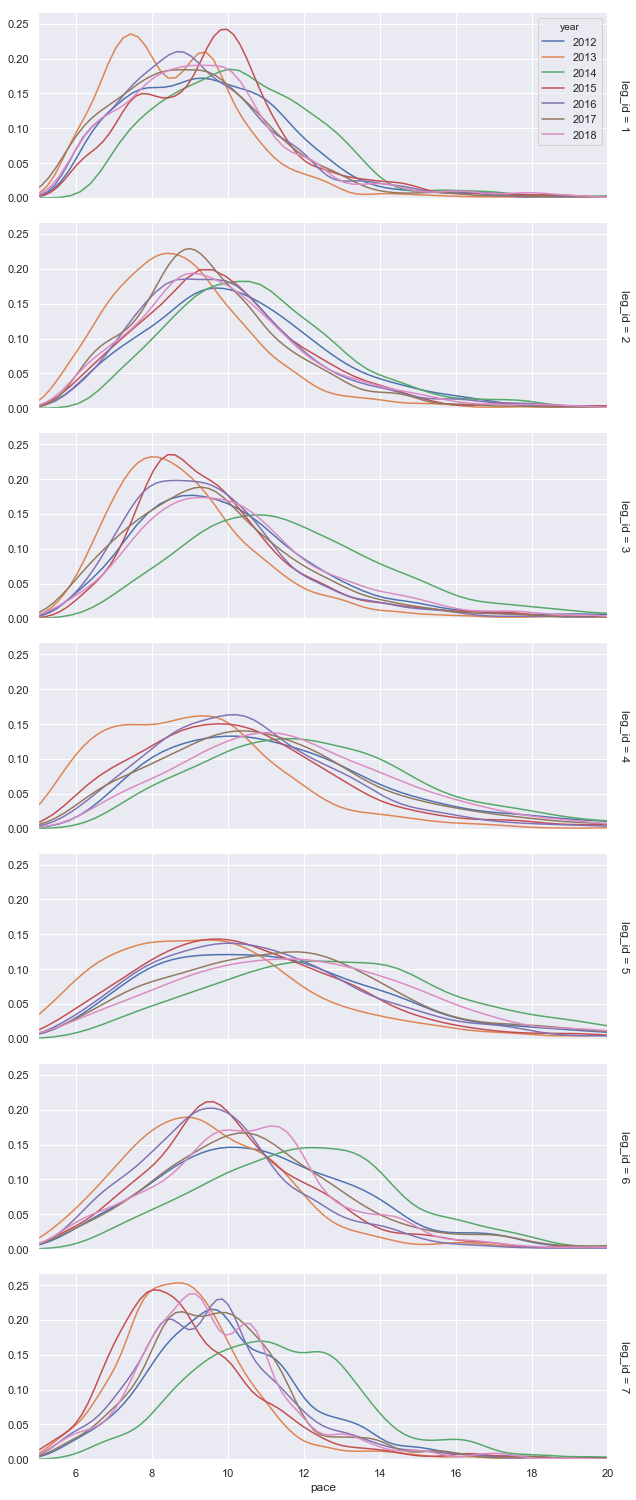

In [9]:
g = sns.FacetGrid(runs, hue="year", row="leg_id",  aspect=3, xlim=(5,20), margin_titles=True, legend_out=False)
g.map(sns.distplot, "pace", hist=False).add_legend()

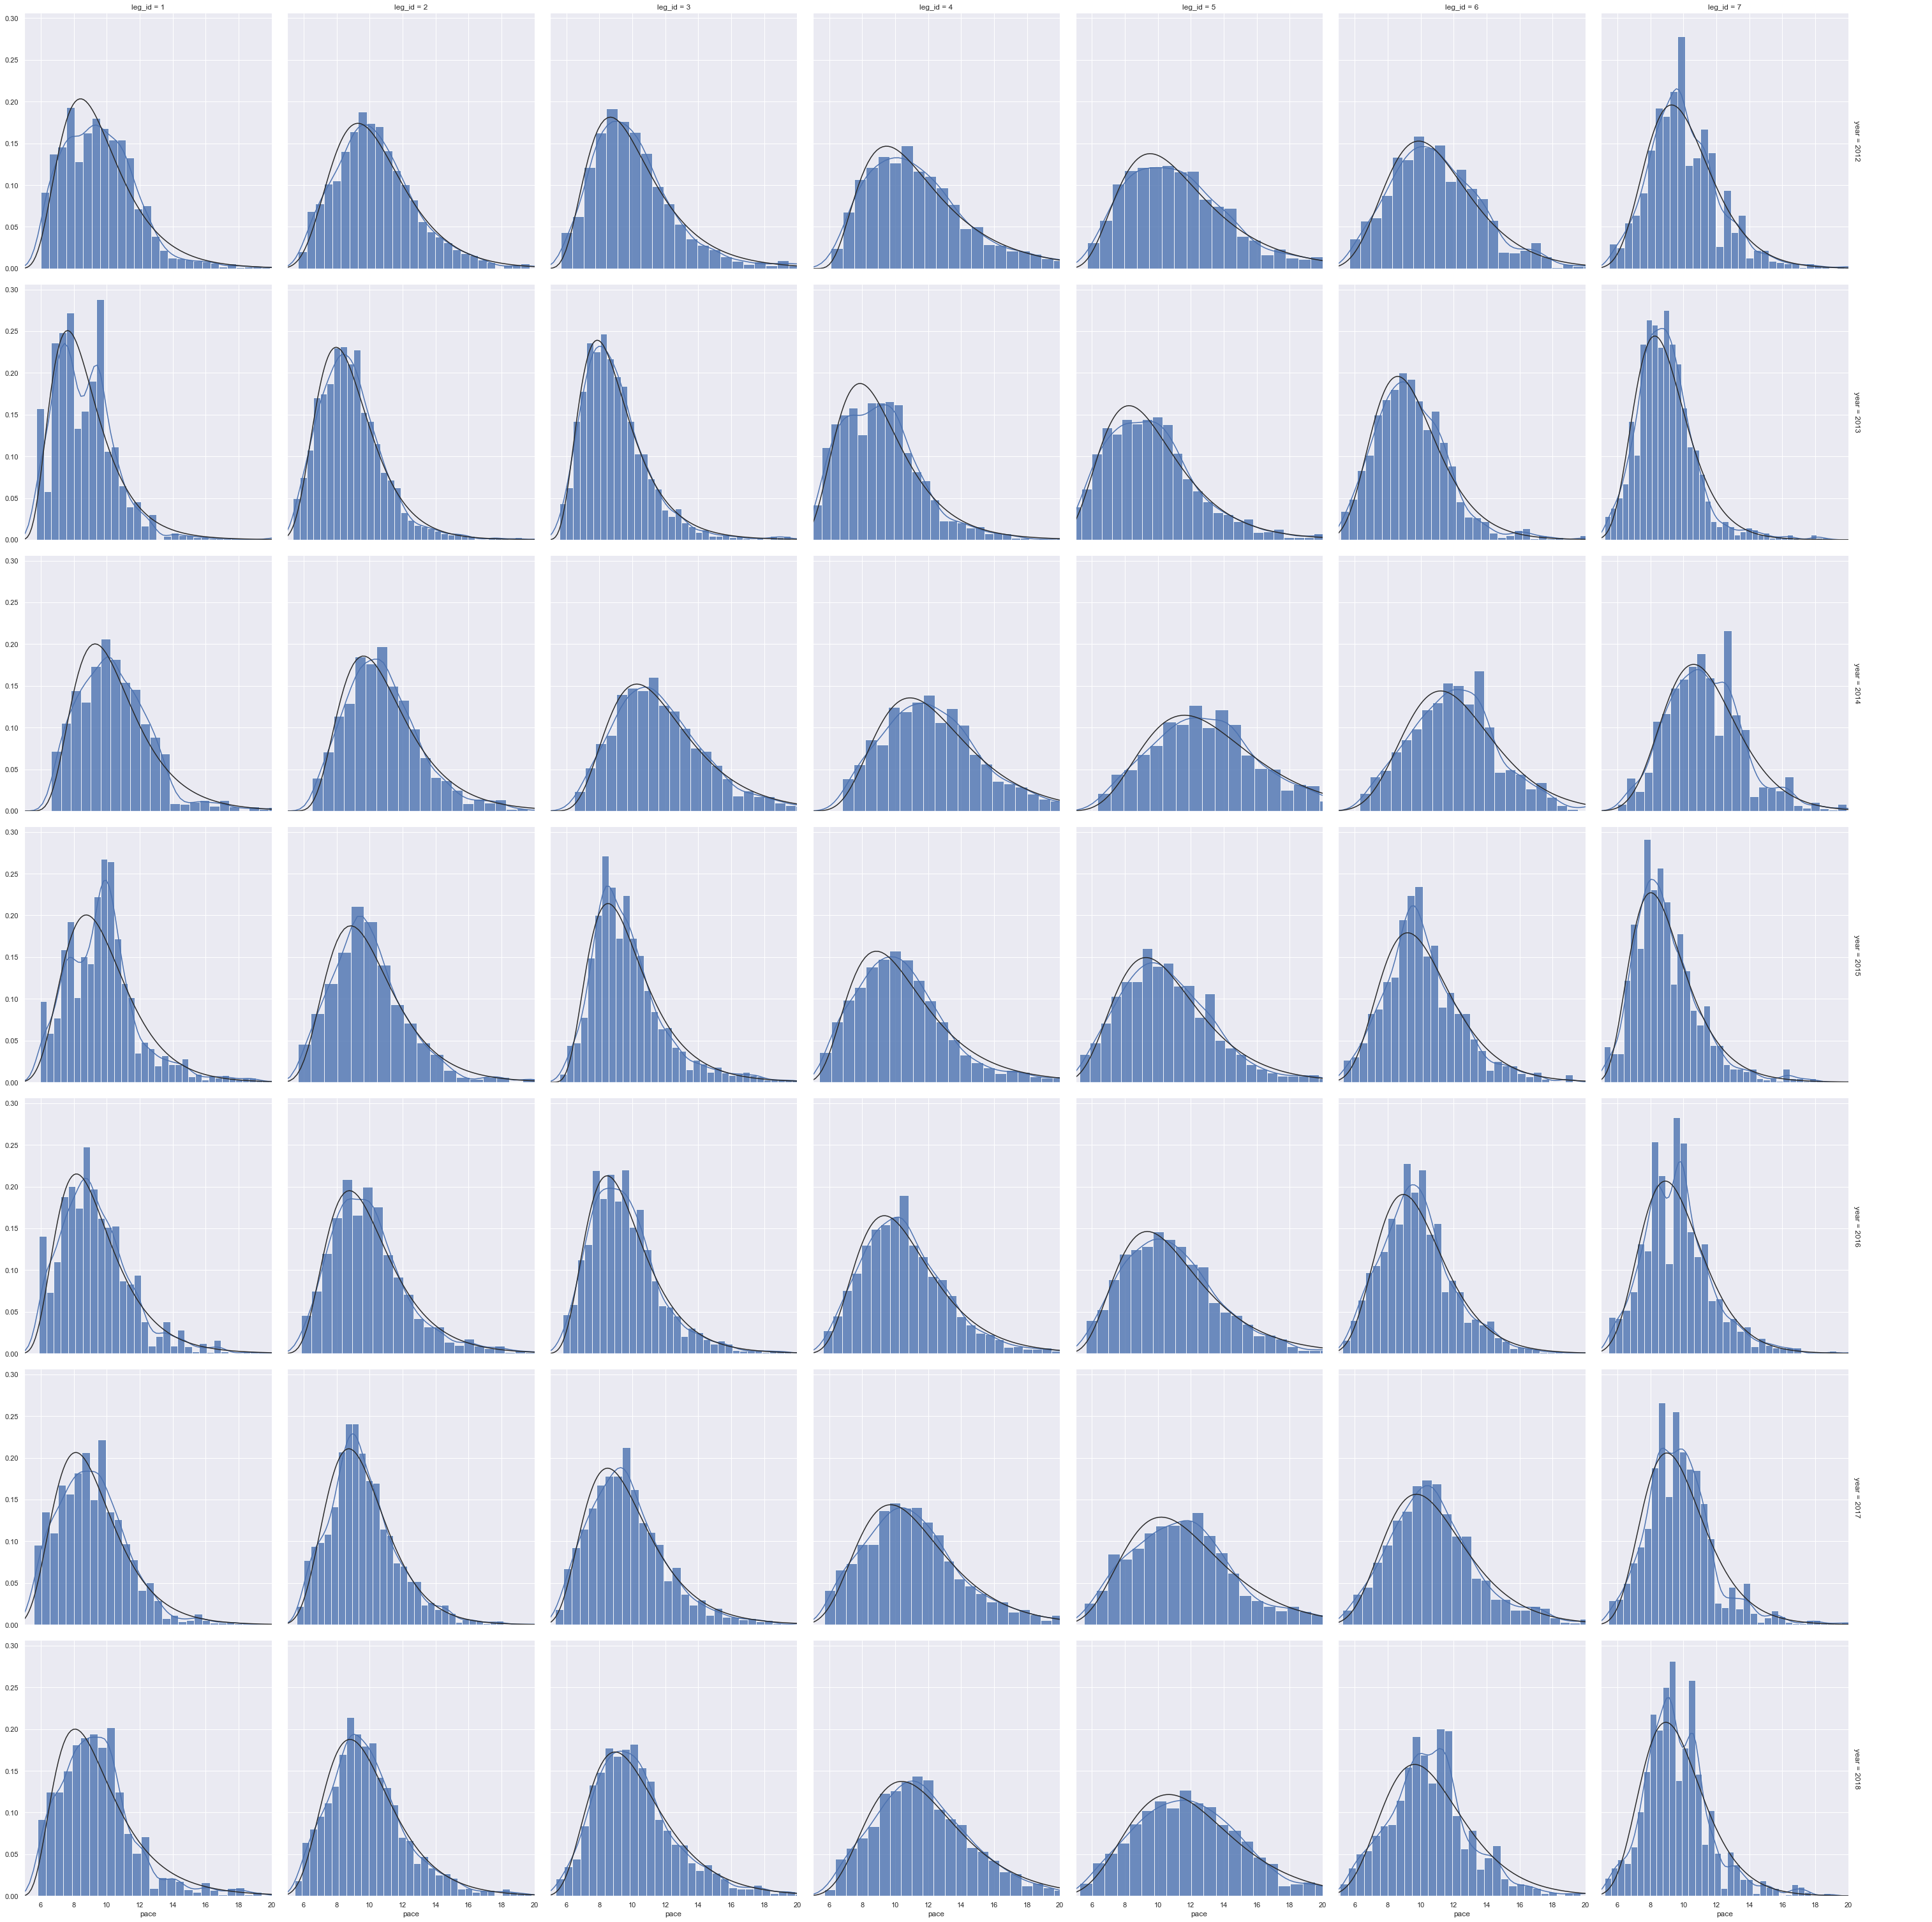

In [10]:
g = sns.FacetGrid(runs, row="year", col="leg_id", height=6, xlim=(5,20), margin_titles=True, despine=True)
g.map(sns.distplot, "pace", hist_kws={'alpha':0.8}, fit=lognorm).add_legend()

In [11]:
runs.sort_values(by="pace")

name  year  team_id    pace  \
2300                                 tue lassen  2013        7   4.753   
63628                               mats haldin  2013        3   4.870   
101                              bartosz pawlak  2013        5   4.874   
1934                                olle kärner  2013        4   4.911   
57750                             jerker lysell  2013       23   4.926   
558                              martin hubmann  2013       24   4.946   
1869                          petteri muukkonen  2013        6   4.961   
3511                            wojciech dwojak  2013       11   4.970   
1215                               olle boström  2013       15   4.981   
180                               jan prochazka  2013        1   4.985   
57849                              pekka itävuo  2013       37   4.985   
49340                           donatas stulgys  2013       20   4.987   
58217                            antti nurmonen  2013       10   4.989   
58003                        jonathan rosendahl  2013       59   4.989   
327                                mikko patana  2013        4   4.996   
57882                             ivo kamenarov  2013       33   5.004   
71955                          mathias karlsson  2013        3   5.009   
71957                            sauter philipp  2013       19   5.032   
2173                               tuomas tervo  2013       12   5.058   
288    thomas carlsson:MALUNGS OK SKOGSMÅRDARNA  2013        2   5.064   
71968                            erik sagvollen  2013       22   5.091   
74447                             tobias noborn  2013        9   5.097   
270                                 emil svensk  2018       54   5.097   
2059                             david lingfors  2013       18   5.115   
692                             nicolas simonin  2013       40   5.119   
1388                        aleksei alekseyonok  2013       41   5.132   
1451                            henrikas pauzas  2013       32   5.141   
160                               ivar lundanes  2013       27   5.147   
2420                                peter öberg  2013       30   5.147   
452                           rassmus andersson  2013       18   5.160   
...                                         ...   ...      ...     ...   
45558                             pekka heikelä  2014     1379  31.855   
44173                             risto kuronen  2018      889  31.930   
56985                              tomi taavila  2016     1299  32.755   
71091                             jukka eskanen  2014      930  32.818   
46475                            joni pakarinen  2018     1349  32.837   
45565                          pentti laaksonen  2012     1227  32.998   
44914                              herman wjuga  2017     1339  33.060   
45098                              vesa peltola  2018     1845  33.071   
62710                            tommi vienonen  2014     1360  33.361   
68292                                ari vesola  2014     1532  33.501   
76282                            oiva vaaranmaa  2012     1575  33.786   
8325              eero lehtonen:STADIN KUMMELIT  2018     1341  33.858   
76311                          pertti syvälahti  2012     1290  34.076   
76339                             merja kaskela  2012     1582  34.078   
43794                                merja rasi  2014     1366  34.154   
44731                      ari hyvönen:OC TUSKA  2018     1255  34.263   
45099                              vesa peltola  2016     1231  35.425   
71329                               juha tontti  2014     1572  35.686   
71453                                riku kokko  2012     1632  36.610   
62547                         lasse vainikainen  2014     1516  36.642   
62756                            julian morgone  2016     1392  36.712   
68488                             arvo majoinen  2014     1501  37.028   
71378                           olavi markkanen

In [12]:
runs["first_name"] = runs.name.str.split(" ", expand=True).iloc[:,0]
runs["first_name"].describe()
counts = runs["first_name"].value_counts()
top_counts = counts[counts > 20]

runs["top_first_name"] = runs["first_name"]

def top_name(first_name): 
    if first_name in top_counts:
        return first_name
    else:
        return  "NA"
    
runs["top_first_name"] = runs.apply(lambda run: top_name(run["first_name"]), axis=1)
#g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()
top_counts.describe()

count     452.000000
mean      143.420354
std       236.130062
min        21.000000
25%        31.000000
50%        54.000000
75%       131.000000
max      1787.000000
Name: first_name, dtype: float64

(4, 20)

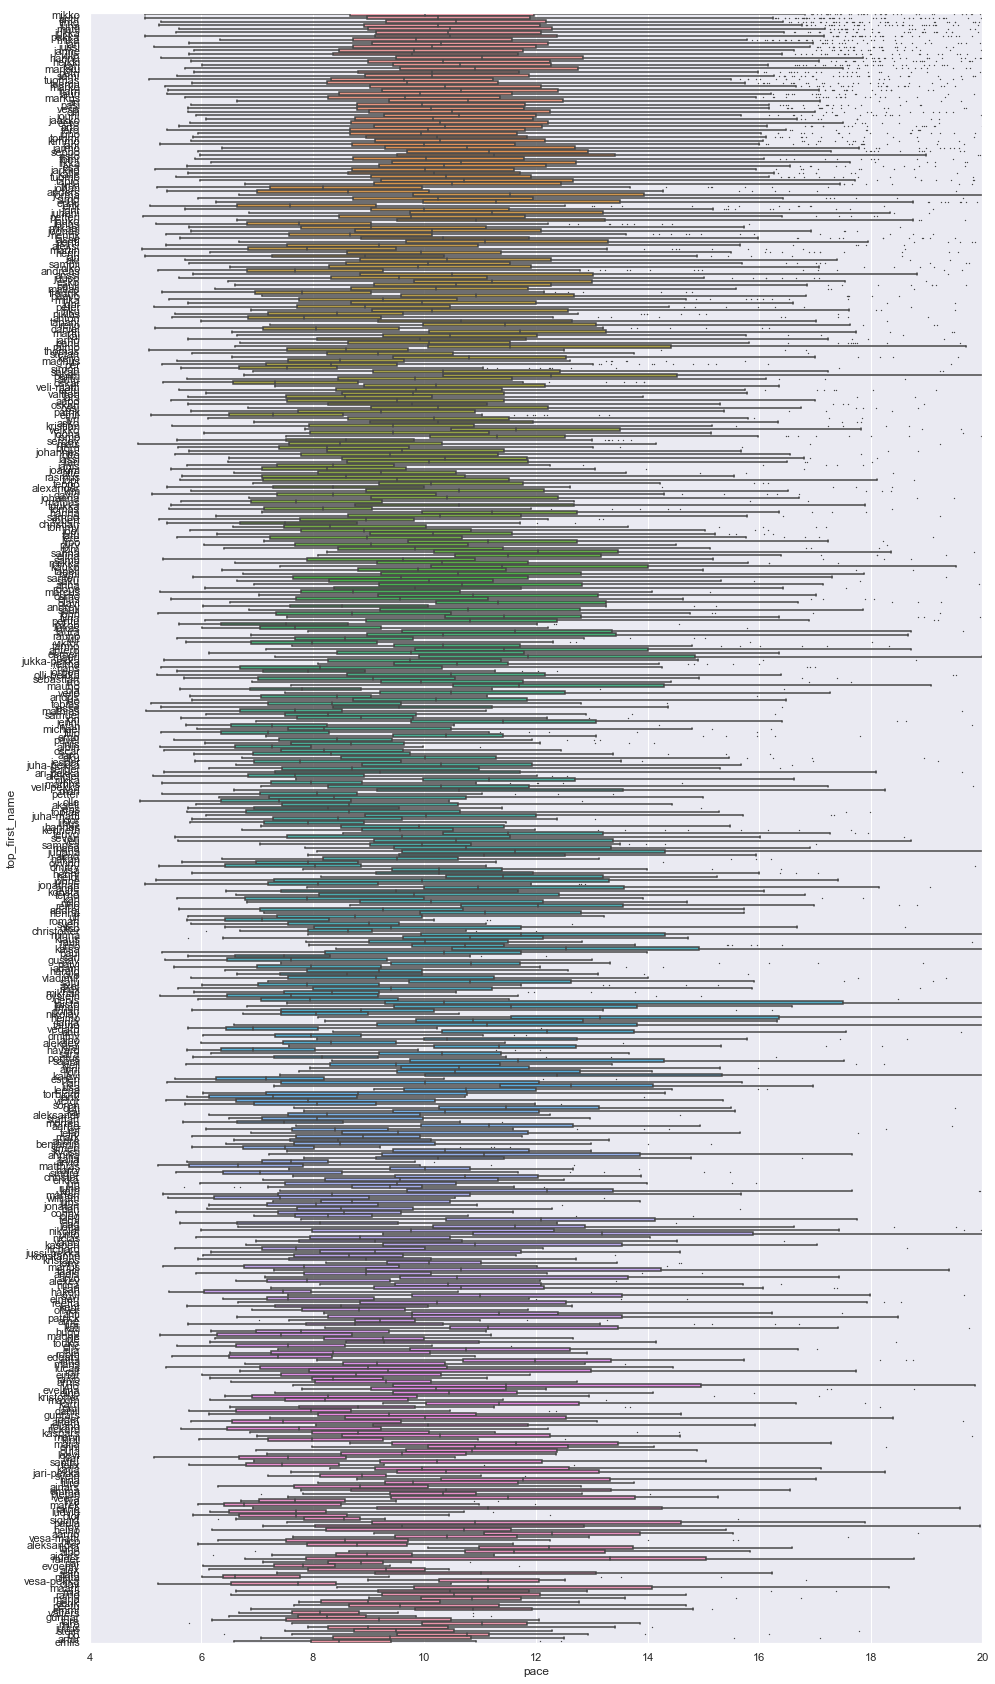

In [13]:
#g = sns.FacetGrid(runs, hue="top_first_name", height=8, aspect=2, xlim=(5,20), margin_titles=True) # no facet here
#g.map(sns.distplot, "pace", hist=False).add_legend()
plt.figure(figsize=(16, 30))
ax_names = sns.boxplot(y="top_first_name", x="pace", data=runs, fliersize=0.5, order=top_counts.index.tolist())
ax_names.set_xlim(4, 20)

In [14]:
runs
runs = runs.assign(team_id_log=np.log(runs.team_id))
runs = runs.assign(team_id_square=np.square(runs.team_id))

runs = runs.assign(team_id_square=np.square(runs.team_id))

first_names = pd.get_dummies(runs[["top_first_name", "leg_id", "num_runs"]])
first_names[["team_id_log", "team_id_square"]] = runs[["team_id_log", "team_id_square"]]
first_names.insert(0, "team_id", runs["team_id"])

import json
with open(f"data/unknown_runners_feature_columns.json", 'w') as outfile:
    json.dump(first_names.columns.tolist(), outfile)

x = first_names.values
y = runs.pace.values

y = y.reshape(len(y), 1)

In [15]:
x.shape

(76545, 473)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2019)

In [17]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)

(51285, 473)

(51285, 1)

(25260, 473)

In [18]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#first_names.columns.shape
#regr.coef_[0].shape
coefs = pd.DataFrame({'feature':first_names.columns, 'coef':regr.coef_[0]})
coefs['feature'] = coefs['feature'].str.replace('top_first_name_','')
display(coefs.sort_values(by="coef").head(20))
display(coefs.sort_values(by="coef", ascending=False).head(20))

feature      coef
428          ulf -1.733199
326          pär -1.602769
269       morten -1.373200
275       nikita -1.357783
120         hugo -1.345322
225        linus -1.282053
72        edgars -1.281424
450      william -1.257542
288         olle -1.254345
287       oliver -1.252701
15        akseli -1.216195
98         felix -1.189394
251     matthias -1.186162
71        dmitry -1.181177
59          carl -1.159698
283         olav -1.148549
158      jonatan -1.130054
29         andre -1.129876
74         eerik -1.120460
462  num_runs_10 -1.094018

feature      coef
114    heimo  4.517845
429     unto  2.851380
391   taisto  2.413487
451     yrjö  2.271019
52      arvo  1.983305
314   pentti  1.926194
255    mauri  1.809482
306  patrick  1.689940
5      aarno  1.628977
254    mauno  1.626896
171   juhana  1.565114
165    jorma  1.473896
198    kauko  1.468026
340    reino  1.427826
327    raimo  1.395492
86      emma  1.358933
188   kalevi  1.293205
284    olavi  1.278912
267    minna  1.253060
390    taavi  1.237027

In [20]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_pred))
y_pred

# Simple linear: Mean squared error: 6.44 Explained variance score: 0.30
# log + square = Mean squared error: 6.21 Explained variance score: 0.320
# 100 first names + leg_id = Mean squared error: 7.842 Explained variance score: 0.101
# 452 first names + leg_id + log + square = Mean squared error: 5.387 Explained variance score: 0.382

Mean squared error: 5.346
Explained variance score: 0.387


array([[ 7.46468169],
       [ 9.9683736 ],
       [10.83561774],
       ...,
       [ 9.55553723],
       [11.69888186],
       [10.59717893]])

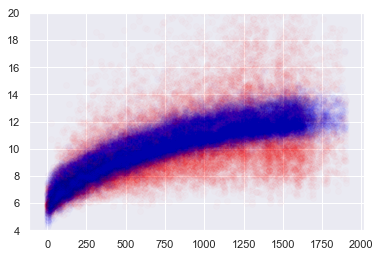

In [21]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
plt.ylim(4, 20)
plt.show()

In [22]:
%%time
rf = RandomForestRegressor(n_estimators=500, random_state=0, verbose=1, n_jobs=-1,
                          max_depth= 31, 
                           max_features="auto", 
                           max_leaf_nodes= 187, 
                           min_impurity_decrease= 0.00026892804687183225, 
                           min_samples_leaf= 0.0027584156528699683, 
                           min_samples_split= 21, 
                           min_weight_fraction_leaf= 0.00837)
rf.fit(x_train, y_train.ravel())
# Make predictions using the testing set
rf_y_pred = rf.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print("Explained variance score: %.3f" % r2_score(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.9min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s


Mean squared error: 5.388
Explained variance score: 0.382
CPU times: user 47min 9s, sys: 1min 27s, total: 48min 37s
Wall time: 4min 54s


[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.2s finished


In [27]:
%%time
import sklearn
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=110,
                                                 criterion='friedman_mse', 
             learning_rate=0.10927990420965396, loss='ls', max_depth=1,
             max_features='auto', max_leaf_nodes=156,
             min_impurity_decrease=0.0, 
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, 
             random_state=0,
             subsample=0.8209381840043655, 
             verbose=1)
#gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3100, random_state=0, verbose=1,  max_features="log2")

gbr.fit(x_train, y_train.ravel())
y_gbr_pred = gbr.predict(x_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_gbr_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_gbr_pred))

#print(f"feature_importances_: {gbr.feature_importances_}")
gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
display(gbr_features.sort_values(by="importance", ascending=False))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           8.3206           0.5515            1.17m
         2           7.9442           0.4340            1.15m
         3           7.5280           0.3618            1.14m
         4           7.2266           0.3051            1.12m
         5           7.0108           0.2355            1.11m
         6           6.8072           0.1916            1.10m
         7           6.7072           0.1622            1.09m
         8           6.4272           0.1285            1.07m
         9           6.3497           0.1152            1.06m
        10           6.2585           0.1023            1.05m
        20           5.7710           0.0249           56.38s
        30           5.6549           0.0119           49.68s
        40           5.6421           0.0029           42.76s
        50           5.5280           0.0012           36.36s
        60           5.5036           0.0004           30.19s
       

NameError: name 'gbr' is not defined

In [ ]:
from time import time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.stats import norm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")




In [ ]:
%%time
#specify parameters and distributions to sample from
crf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, 
                                                 random_state=0, 
                                                 verbose=1, 
                                                 n_iter_no_change=100, tol=0.000001)

param_dist_gbr = { 
    "max_leaf_nodes": np.rint(np.abs(norm.rvs(loc=156, scale=10, size=1000))).astype("int"), 
    "max_depth": np.rint(np.abs(norm.rvs(loc=1, scale=1, size=1000))).astype("int"), 
    "max_features": ["auto", "sqrt"], 
    "learning_rate": np.abs(norm.rvs(loc=0.11, scale=0.01, size=1000)), 
    "subsample": np.abs(norm.rvs(loc=0.83, scale=0.1, size=1000)) }

n_iter_search = 5 
random_search = RandomizedSearchCV(crf, param_distributions=param_dist_gbr, random_state=2019, 
                                   n_iter=n_iter_search, cv=3, n_jobs=-1, error_score=0, verbose=1)

start = time() 
random_search.fit(x_train, y_train.ravel()) 
print("RandomizedSearchCV took %.2f seconds for %d candidates" " parameter settings." % ((time() - start), n_iter_search)) 
report(random_search.cv_results_) 
print(random_search.best_estimator_)



In [ ]:
crf_y_pred = random_search.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, crf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, crf_y_pred))
r2 = r2_score(y_test, crf_y_pred)

with open(f"data/rf-best_estimator_{r2:.3f}.json", 'w') as outfile:
    outfile.write(str(random_search.best_estimator_.get_params()))

In [ ]:
# plot it as in the example at http://scikit-learn.org/
#plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
#plt.scatter(x_test[:,0], rf_y_pred, color='blue', alpha=0.01)
#plt.ylim(4, 20)
#plt.show()

In [ ]:
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
#y_rbf_pred = svr_rbf.fit(x_train, y_train.ravel()).predict(x_test)
#print("Mean squared error: %.3f"
#      % mean_squared_error(y_test, y_rbf_pred))
# Explained variance score: 1 is perfect prediction
#print('Explained variance score: %.3f' % r2_score(y_test, y_rbf_pred))


In [ ]:
br = linear_model.BayesianRidge()
br.fit(x_train, y_train.ravel())
y_br_pred = br.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_br_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_br_pred))




In [ ]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train.ravel())
y_ransac_pred = ransac.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_ransac_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_ransac_pred))


In [33]:
np.log2(17)

4.087462841250339